# Nikkei High Dividend Yield 50 Analysis with Portfolio Optimizer



## Initialization

If you are using CoLab, first install the dependency PyPortfolioOpt

In [3]:
!pip install git+https://github.com/robertmartin8/PyPortfolioOpt.git

  Cloning https://github.com/robertmartin8/PyPortfolioOpt.git to /tmp/pip-req-build-0noae6ft
  Running command git clone -q https://github.com/robertmartin8/PyPortfolioOpt.git /tmp/pip-req-build-0noae6ft
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.7 MB 5.4 MB/s 
  Created wheel for pyportfolioopt: filename=PyPortfolioOpt-1.5.1-py3-none-any.whl size=61313 sha256=94c12cec08c37a99f00bcdda99a5c44885353914f1f07061ea01990ea10cb8fc
  Stored in directory: /tmp/pip-ephem-wheel-cache-yrz8ciru/wheels/d0/b4/20/a9c62513c6166350c6dfdea774d9f81a018001524956fdb96e
Successfully built pyportfolioopt
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


Then get our PortfolioOptimizer library and the necessary datasets from our repository

In [4]:
!wget https://raw.githubusercontent.com/cartasuzuki/phynance/master/PortfolioOptimizer.py

--2022-01-15 04:06:45--  https://raw.githubusercontent.com/cartasuzuki/phynance/master/PortfolioOptimizer.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2691 (2.6K) [text/plain]
Saving to: ‘PortfolioOptimizer.py’

PortfolioOptimizer. 100%[===================>]   2.63K  --.-KB/s    in 0s      

2022-01-15 04:06:45 (33.4 MB/s) - ‘PortfolioOptimizer.py’ saved [2691/2691]



Import libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PortfolioOptimizer import PortfolioOptimizer

In [8]:
stock_symbols = pd.read_csv('https://raw.githubusercontent.com/cartasuzuki/phynance/master/datasets/nikkei_high_dividend_yield_50_weight_en.csv')

Once we have loaded our stock symbols dataset we can either use the prices in the csv file or download prices from alphadvantage to get updated data.

### Filter out some stocks from the index

Chose a minimum div/yield. Set to 0 if you want to use all stocks in the index

In [6]:
min_yield = 3.5

In [56]:
selected_stocks = stock_symbols[stock_symbols['Dividend']>min_yield]

Create a filter string (highDivString) to be used later to filter stocks with lower yield than min_yield

In [10]:
highDivString = selected_stocks['Code'].values.astype(int)
highDivString = highDivString.astype(str)
string = '.TOK'
#highDivString = [x + string for x in highDivString]

### Method 1: use csv file

Read the stock prices from the csv provided in our repository

In [12]:
stocks = pd.read_csv('https://raw.githubusercontent.com/cartasuzuki/phynance/master/datasets/nikkei50.csv', index_col= ['timestamp'], parse_dates= ['timestamp'])
#stocks = pd.read_csv('https://raw.githubusercontent.com/cartasuzuki/phynance/master/datasets/nikkei_high_dividend_yield_50_prices.csv', index_col= ['timestamp'], parse_dates= ['timestamp'])

In [31]:
highDivString

array(['2768', '2914', '4061', '4183', '4188', '4208', '4502', '4902',
       '5020', '5108', '5214', '5703', '6113', '6178', '6301', '6471',
       '6472', '7201', '7267', '7270', '7751', '8002', '8031', '8053',
       '8058', '8304', '8306', '8308', '8316', '8354', '8411', '8601',
       '8628', '8725', '8766', '9412', '9437'], dtype='<U21')

If you want higher yield filter out using the filter previously created

In [13]:
stocks = stocks[highDivString]

In [29]:
stocks = stocks.replace(',','', regex=True)
cols=[i for i in stocks.columns if i not in ["timestamp"]]

for col in cols:
    stocks[col]=pd.to_numeric(stocks[col])

In [30]:
stocks.head()

,2768,2914,4061,4183,4188,4208,4502,4902,5020,5108,5214,5703,6113,6178,6301,6471,6472,7201,7267,7270,7751,8002,8031,8053,8058,8304,8306,8308,8316,8354,8411,8601,8628,8725,8766,9412,9437
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-13,1830.0,2363.0,4050,3460,905.3,2161,3363.0,534,459.6,5105.0,2924,1868,1197,993.2,3010.0,831,259,646.0,3515.0,2226.0,2798.0,1194.0,2927.5,1757.5,3918.0,2731,714.2,515.7,4304.0,2299,1600.5,712.6,818,3951.0,7060,437,3880.0
2022-01-12,1794.0,2367.5,3965,3350,892.4,2114,3344.0,534,456.9,5139.0,2920,1848,1195,991.9,2975.5,835,258,631.9,3520.0,2216.5,2796.0,1158.0,2870.5,1727.5,3814.0,2702,704.0,501.6,4280.0,2260,1589.0,700.7,819,3902.0,6990,433,3880.0
2022-01-11,1773.0,2365.5,3915,3290,877.5,2087,3275.0,532,449.8,5092.0,2862,1817,1172,991.9,2940.0,806,252,622.3,3482.0,2196.0,2817.5,1126.5,2805.0,1709.0,3772.0,2708,701.4,498.0,4255.0,2250,1587.5,697.6,815,3898.0,7010,430,3880.0
2022-01-07,1773.0,2332.5,3890,3285,868.8,2083,3196.0,532,448.2,5082.0,2885,1779,1185,967.6,2889.0,814,253,629.0,3430.0,2206.0,2804.0,1118.5,2785.5,1708.5,3771.0,2612,685.8,484.3,4150.0,2147,1540.5,675.2,805,3791.0,6933,429,3880.0
2022-01-06,1777.0,2329.0,3885,3225,865.8,2049,3175.0,530,442.1,5093.0,2918,1766,1179,957.4,2894.0,790,250,615.8,3408.0,2191.0,2810.5,1126.0,2798.0,1711.0,3755.0,2596,663.0,471.0,4085.0,2053,1524.0,664.1,794,3751.0,6876,430,3880.0


## Portfolio Optimization

In [43]:


weights, sharpe, ret = PortfolioOptimizer.optimize_portfolio(stocks,0,0.2)

8002: 20.0%
8031: 20.0%
8058: 20.0%
8766: 20.0%
9437: 20.0%
Sharpe: 0.32
Exp. Return: 8.07


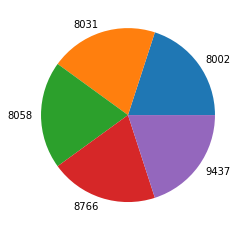

In [44]:
PortfolioOptimizer.print_portfolio_result(weights, sharpe, ret)
PortfolioOptimizer.portfolioAsPieChart(weights)

Average yield

In [45]:
selected_stocks['Dividend'].mean()

3.8366666666666673

Remove 0s and TOK string.

In [54]:
www ={x:y for x,y in weights.items() if y>0.001}
portfolio =list(www.keys())
portfoliovalues = list(www.values())

portfolio

['8002', '8031', '8058', '8766', '9437']

### Resulting Portfolio

In [57]:
selected_stocks = selected_stocks[selected_stocks['Code'].isin(portfolio)]


In [58]:
selected_stocks

,Date of Data,Code,Company Name,Nikkei Industrial Classification,Weight,Dividend
27,2018/11/30,8002,MARUBENI CORP.,Trading Companies,2.5729%,4.26
28,2018/11/30,8031,"MITSUI & CO., LTD.",Trading Companies,2.7195%,4.11
31,2018/11/30,8058,MITSUBISHI CORP.,Trading Companies,3.0817%,4.38
44,2018/11/30,8766,"TOKIO MARINE HOLDINGS, INC.",Insurance,2.9531%,3.60
47,2018/11/30,9437,"NTT DOCOMO, INC.",Communications,2.9280%,3.80


In [36]:
 Div_Yield = np.average(selected_stocks['Dividend'], weights=selected_stocks['Weight'])
round(Div_Yield, 2)

3.92